# PHP - Pulsating Heat Pipe [DI, 40FR]

In [1]:
from analysis import PulseHeatPipe
from analysis import DataVisualisation

In [2]:
analysis = PulseHeatPipe("data/di_water_exp/40_FR/")

Data loaded from directory: data/di_water_exp/40_FR/


In [3]:
df, df_conv = analysis.data_etl()

Compiled and converted data is saved at: data/di_water_exp/40_FR/'combined_converted_data.csv'


In [4]:
df_gfe = analysis.gibbs_fe(df_conv)

Gibbs Free Energy calculated data saved at: data/di_water_exp/40_FR/'gfe_combined.csv


In [5]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,0.0,301.483333,298.90,2.583333,0.413299,0.032292,-2214.730882,-2195.753421,-18.977461
1,0.5,301.483333,299.40,2.083333,0.413299,0.026042,-2214.730882,-2199.426478,-15.304404
2,1.0,300.816667,299.40,1.416667,0.413299,0.017708,-2209.833472,-2199.426478,-10.406995
3,1.5,301.483333,299.40,2.083333,0.413299,0.026042,-2214.730882,-2199.426478,-15.304404
4,2.0,304.150000,300.15,4.000000,0.413299,0.050000,-2234.320518,-2204.936063,-29.384455
...,...,...,...,...,...,...,...,...,...
462,58.0,365.350000,342.90,22.450000,1.258429,0.280625,698.217563,655.313542,42.904022
463,58.5,365.550000,343.40,22.150000,1.258429,0.276875,698.599782,656.269088,42.330694
464,59.0,365.550000,342.65,22.900000,1.258429,0.286250,698.599782,654.835769,43.764013
465,59.5,365.350000,342.40,22.950000,1.258429,0.286875,698.217563,654.357996,43.859568


In [6]:
visual = DataVisualisation('DI_WATER_40FR')

Data loaded from directory: DI_WATER_40FR


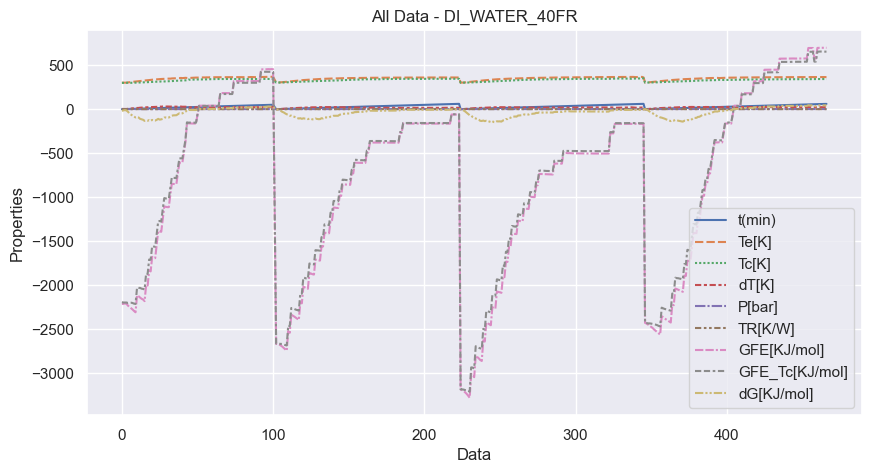

In [7]:
visual.plot_all_data(df_gfe)

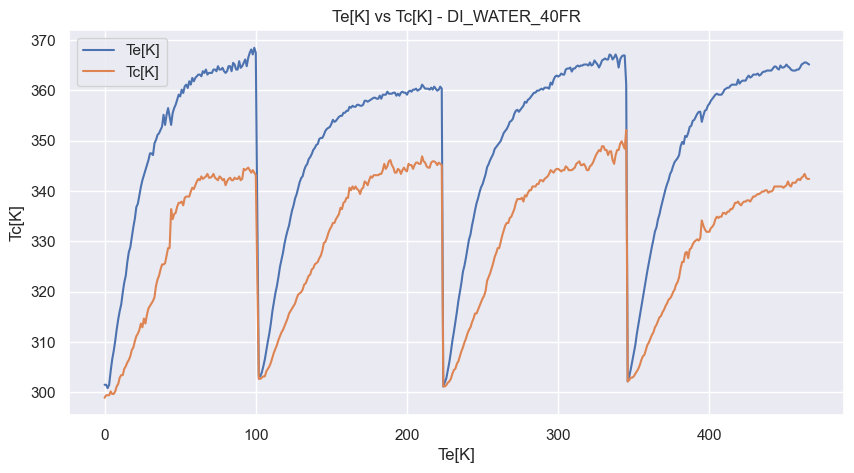

In [8]:
visual.plot_Te_Tc(df_gfe)

In [9]:
df_selected =  analysis.data_chop(df_gfe)    

Optimal range of temperature(Te) for data selection: [Tmin:300.8167, Tmax:368]


In [10]:
df_mean, df_std = analysis.data_stat(df_selected)

Calculated mean and standard deviation values saved at data/di_water_exp/40_FR/'combined_mean.csv' and 'combined_std.csv'


In [11]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,300.816667,1.000000,299.400000,1.416667,0.413299,0.017708,-2209.833472,-2199.426478,-10.406995
1,301.150000,0.000000,301.150000,0.000000,0.279977,0.000000,-3187.408910,-3187.408910,0.000000
2,301.483333,0.666667,299.233333,2.250000,0.413299,0.028125,-2214.730882,-2198.202125,-16.528756
3,301.950000,0.500000,301.150000,0.800000,0.279977,0.010000,-3195.876209,-3187.408910,-8.467299
4,302.150000,0.000000,302.150000,0.000000,0.379969,0.000000,-2430.851396,-2430.851396,0.000000
...,...,...,...,...,...,...,...,...,...
221,366.950000,58.333333,348.483333,18.466667,0.946588,0.230833,-167.462381,-159.034879,-8.427502
222,367.150000,53.666667,346.400000,20.750000,1.017845,0.259375,39.627637,36.118359,3.509278
223,367.483333,49.000000,343.650000,23.833333,1.160357,0.297917,454.402393,424.931876,29.470517
224,368.150000,48.500000,343.650000,24.500000,1.160357,0.306250,455.226743,424.931876,30.294867


In [12]:
analysis.data_property_avg(df_mean, df_std)

Tc  average:     323.712 +- 2.1346 [K]
P   average:     0.6743 +- 0.0613 [bar]
dT  average:     18.4649 +- 2.1346 [K]
TR  average:     0.2308 +- 0.0267 [K/W]
GFE average:     -1289.4411 +- 218.0993 [KJ/mol]



In [13]:
analysis.best_TP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-146.7584]
Te optimal:        337.55[K] 
P  optimal:        0.4466[bar] 
dT optimal:        21.9[K] 
TR optimal:        0.2738[K/W] 
GFE optimal:       dG(337.55, 0.4466) = -2262.022 [KJ/mol]



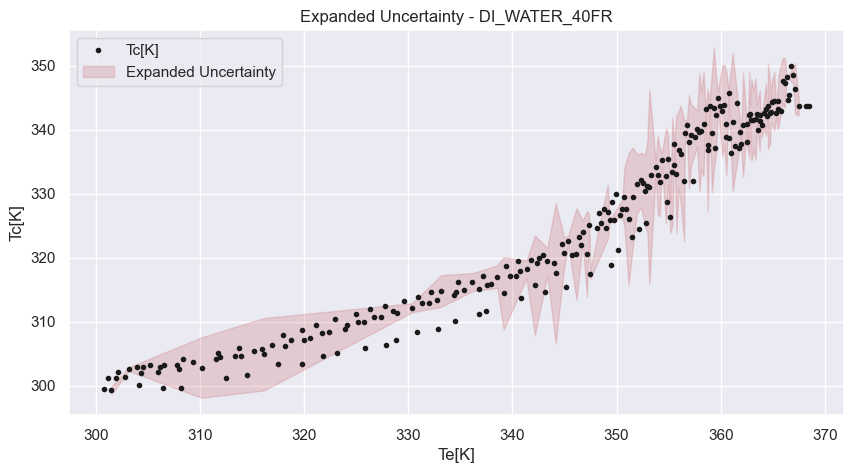

In [14]:
visual.plot_eu(df_mean, df_std, 'Tc[K]')

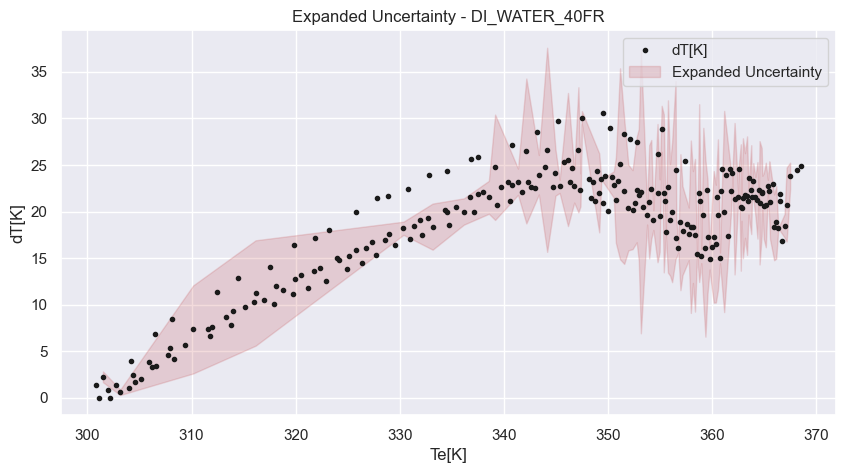

In [15]:
visual.plot_eu(df_mean, df_std, 'dT[K]')

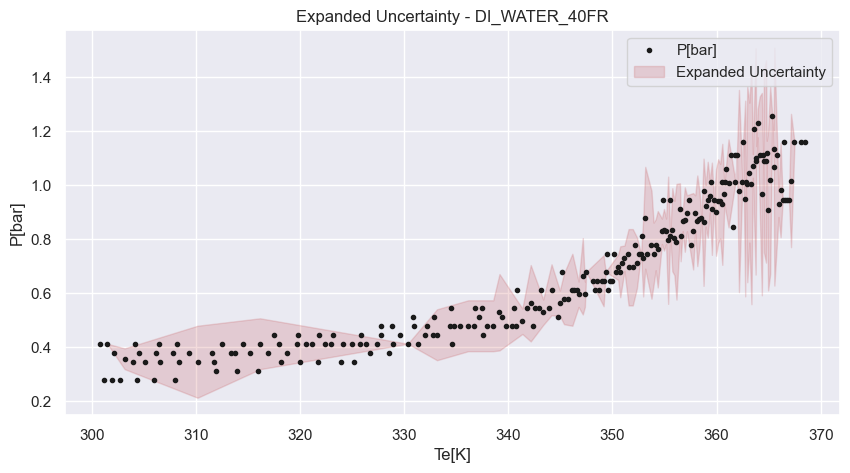

In [16]:
visual.plot_eu(df_mean, df_std, 'P[bar]')

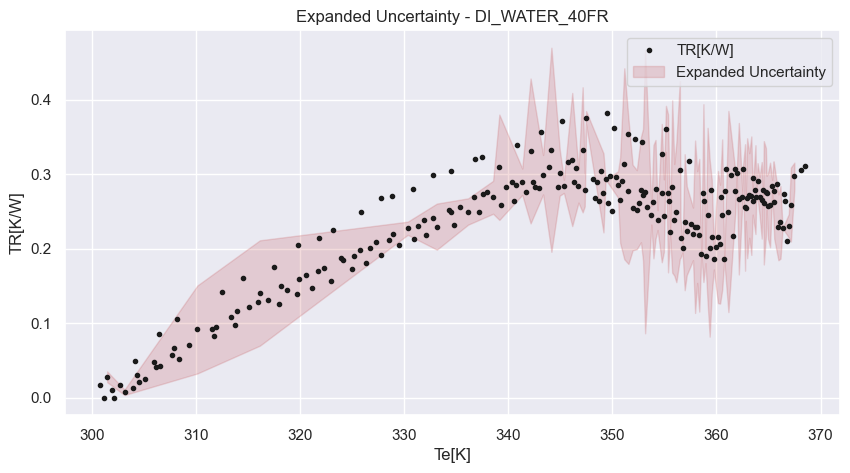

In [17]:
visual.plot_eu(df_mean, df_std, 'TR[K/W]')

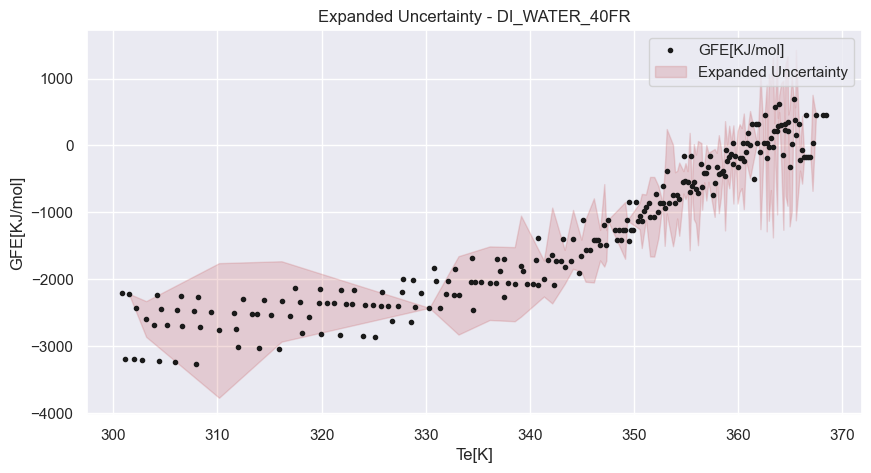

In [18]:
visual.plot_eu(df_mean, df_std, 'GFE[KJ/mol]')

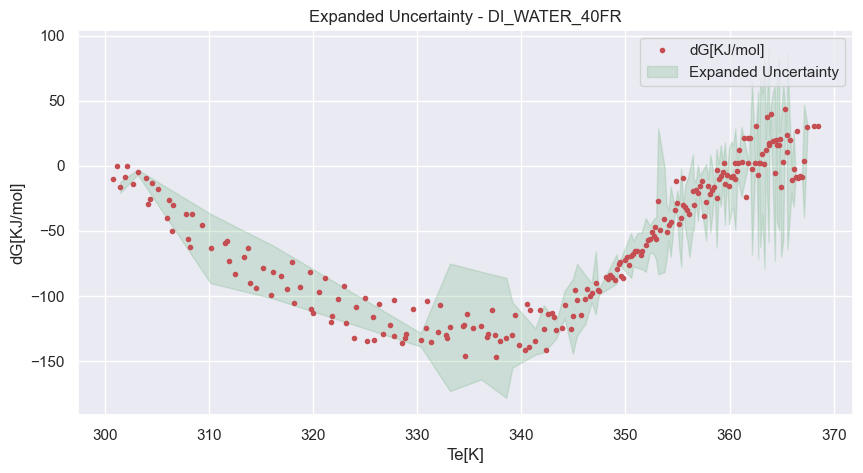

In [20]:
visual.plot_eu(df_mean, df_std, 'dG[KJ/mol]','.r','g')